In [1]:
import pandas as pd
import sklearn.tree as tree
import sklearn.grid_search as grid

In [3]:
fund = pd.read_csv('Fund1.csv', parse_dates=[[0,1]], index_col='Month_Year', thousands=',').abs()
fund1 = fund.rename(columns={'Income Distributed' : 'Income_Distributed', 'Fund Size': 'Fund_Size'})
fund1.head()

,Sales,Redemption,Net,Income_Distributed,Fund_Size,Dividend,FBMKLCI
Month_Year,,,,,,,
1992-01-01,3.755638e+08,5.403470e+08,1.647832e+08,1.035420e+09,1.031930e+10,12.5,570.64
1992-02-01,4.194861e+08,3.846571e+08,3.482893e+07,NaN,1.035413e+10,NaN,605.06
1992-03-01,3.804028e+08,5.538938e+08,1.734910e+08,NaN,1.018064e+10,NaN,593.21
1992-04-01,3.179610e+08,2.151399e+08,1.028211e+08,NaN,1.028346e+10,NaN,591.63
1992-05-01,4.158162e+08,2.657969e+08,1.500193e+08,NaN,1.043348e+10,NaN,589.09


# Prediction on next month Fund 1 redemption against current Fund 1 sales and FBMKLCI

In [24]:
redemption_regressor = tree.DecisionTreeRegressor(max_depth=3)

In [25]:
X_salesklci = fund1[['Sales', 'FBMKLCI']].drop(fund1.index[[292]])
y_red = fund1.Redemption.shift(-1).drop(fund1.index[[292]])

In [26]:
redemption_regressor.fit(X_salesklci,y_red)
zip(y_red, redemption_regressor.predict(X_salesklci))

[(384657134.29000002, 703738813.74389589),
 (553893777.71000004, 703738813.74389589),
 (215139914.18000001, 703738813.74389589),
 (265796917.88, 703738813.74389589),
 (235537066.16999999, 703738813.74389589),
 (231782285.16999999, 703738813.74389589),
 (218321156.06, 703738813.74389589),
 (206338437.63, 703738813.74389589),
 (283651417.77999997, 703738813.74389589),
 (199000080.22999999, 703738813.74389589),
 (85213150.670000002, 703738813.74389589),
 (602676521.53999996, 703738813.74389589),
 (377742420.41000003, 703738813.74389589),
 (355124147.95999998, 703738813.74389589),
 (360631017.06999999, 703738813.74389589),
 (333347250.56, 703738813.74389589),
 (320306374.27999997, 703738813.74389589),
 (289551454.69999999, 703738813.74389589),
 (280665212.63, 703738813.74389589),
 (318474978.74000001, 703738813.74389589),
 (304617879.26999998, 703738813.74389589),
 (261608185.37, 703738813.74389589),
 (118177186.84, 703738813.74389589),
 (1278963348.04, 703738813.74389589),
 (685715507.169

In [27]:
import sklearn.metrics as metrics
print metrics.mean_squared_error(y_red, redemption_regressor.predict(X_salesklci))
print metrics.r2_score(y_red, redemption_regressor.predict(X_salesklci))

2.47352927528e+17
0.736340626095


In [28]:
pd.DataFrame({'feature':['Sales', 'FBMKLCI'], 'importance':redemption_regressor.feature_importances_})

,feature,importance
0,Sales,0.250339
1,FBMKLCI,0.749661


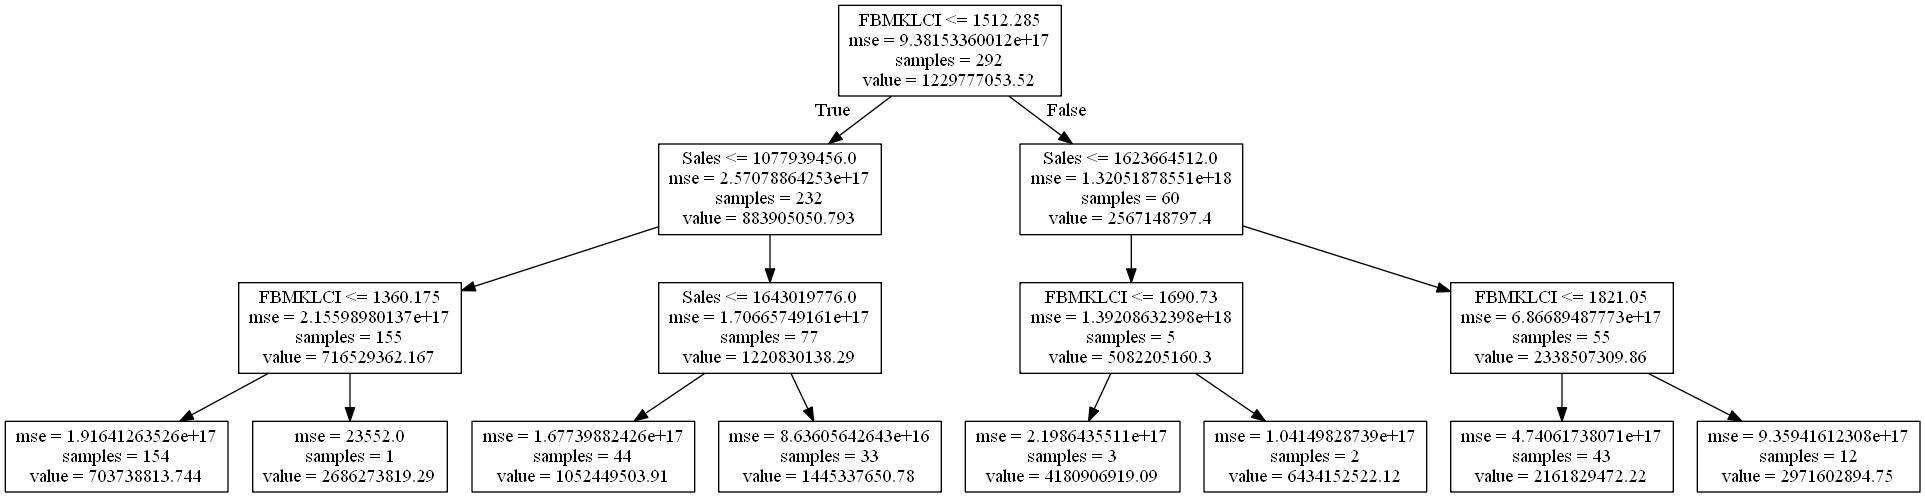

In [29]:
import StringIO
s = StringIO.StringIO()
tree.export_graphviz(redemption_regressor, out_file=s, feature_names=['Sales', 'FBMKLCI'])
import pydotplus
graph = pydotplus.graph_from_dot_data(s.getvalue())
import IPython.display
IPython.display.Image(graph.create_png())

In [30]:
rdtr = tree.DecisionTreeRegressor()
redemption_force = grid.GridSearchCV(rdtr, {'max_depth':range(1,10)}, cv=10, scoring='r2')
redemption_force.fit(X_salesklci,y_red)
print redemption_force.best_params_
print redemption_force.best_score_

{'max_depth': 3}
-0.801034676823


In [37]:
redemption_regressor.predict([30000000, 1500])

S:\Program Files\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([  2.90211842e+08])

In [31]:
%matplotlib inline

import matplotlib.pyplot as plt

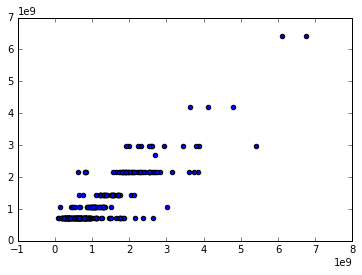

In [32]:
plt.scatter(y_red, redemption_regressor.predict(X_salesklci))

# Prediction on next month Fund 1 Sales against current FBMKLCI

In [40]:
sales_regressor = tree.DecisionTreeRegressor(max_depth=2)
X_klci = fund1[['FBMKLCI']].drop(fund1.index[[292]])
y_sales = fund1.Sales.shift(-1).drop(fund1.index[[292]])
sales_regressor.fit(X_klci,y_sales)
zip(y_sales, sales_regressor.predict(X_klci))

[(419486066.5, 615264512.22010863),
 (380402760.38999999, 615264512.22010863),
 (317961017.23000002, 615264512.22010863),
 (415816178.63999999, 615264512.22010863),
 (308147146.41000003, 615264512.22010863),
 (382383350.24000001, 615264512.22010863),
 (386455227.76999998, 615264512.22010863),
 (372476143.70999998, 615264512.22010863),
 (339586302.63999999, 615264512.22010863),
 (362649948.44, 615264512.22010863),
 (284009103.73000002, 615264512.22010863),
 (374265012.91000003, 615264512.22010863),
 (364647921.72000003, 615264512.22010863),
 (352608353.56999999, 615264512.22010863),
 (380425407.61000001, 615264512.22010863),
 (369216080.04000002, 615264512.22010863),
 (369511002.79000002, 615264512.22010863),
 (461981733.01999998, 615264512.22010863),
 (399998113.56, 615264512.22010863),
 (454185981.60000002, 615264512.22010863),
 (450402768.62, 1035180974.6341821),
 (443403195.95999998, 1035180974.6341821),
 (297218009.69, 1035180974.6341821),
 (498705895.63999999, 1775490185.8848147),

In [41]:
print metrics.mean_squared_error(y_sales, sales_regressor.predict(X_klci))
print metrics.r2_score(y_sales, sales_regressor.predict(X_klci))

2.01194084784e+17
0.73994930667


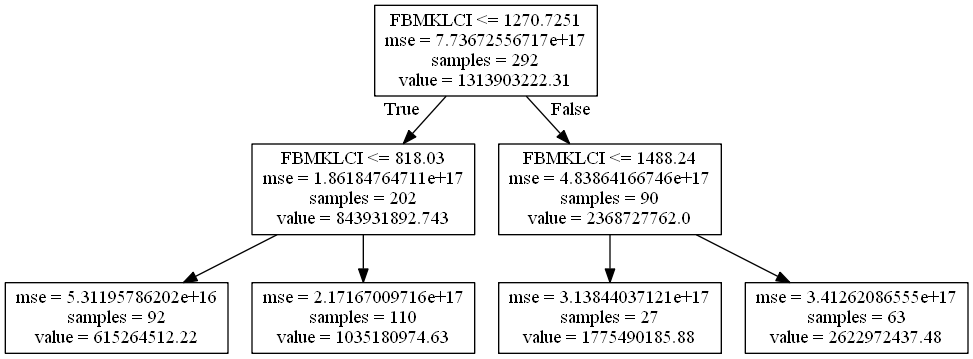

In [42]:
sales = StringIO.StringIO()
tree.export_graphviz(sales_regressor, out_file=sales, feature_names=['FBMKLCI'])
import pydotplus
sales_graph = pydotplus.graph_from_dot_data(sales.getvalue())
import IPython.display
IPython.display.Image(sales_graph.create_png())

In [43]:
sdtr = tree.DecisionTreeRegressor()
sales_force = grid.GridSearchCV(sdtr, {'max_depth':range(1,10)}, cv=10, scoring='r2')
sales_force.fit(X_klci,y_sales)
print sales_force.best_params_
print sales_force.best_score_

{'max_depth': 2}
-3.6470087755


In [50]:
sales_regressor.predict([1500])

S:\Program Files\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([  1.91718455e+09])

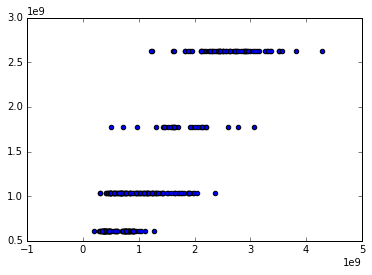

In [44]:
plt.scatter(y_sales, sales_regressor.predict(X_klci))